In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'neural assignment/MLP/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


# WORK WITH IRIS DATASET

# Required library

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

import model
from model import Model

# Required function

In [4]:
def one_hot_encode(y, classes=None):
    y = np.array(y)
    if classes is None:
        classes = np.unique(y)
    n_classes = len(classes)
    out = np.zeros((len(y), n_classes))
    for i in range(n_classes):
        out[np.argwhere(y == classes[i]), i] = 1
    return out


# Load Data

In [5]:
iris = datasets.load_iris()

In [6]:
X, y = iris.data, iris.target

In [7]:
X_origin = X.reshape(X.shape[0], -1)
y_origin = one_hot_encode(y)

# Taking 30% test set

In [8]:
x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(X_origin, y_origin, test_size=0.3)

Batch Gradient Decent

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_ori, y_train_ori, test_size=0.3)
ep = 500
mlp = Model()
mlp.add_layer(4, 12, act_fn='sigmoid')
mlp.add_layer(12, 24, act_fn='sigmoid')
mlp.add_layer(24, 12, act_fn='sigmoid')
mlp.add_layer(12, 3, act_fn='softmax')
losses, accs = mlp.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=x_train.shape[0], loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.3681248699060297 acc =  0.3125
epoch  1 loss =  0.36592442470606923 acc =  0.3125
epoch  2 loss =  0.3637986533709205 acc =  0.3125
epoch  3 loss =  0.36175107050821126 acc =  0.3125
epoch  4 loss =  0.359785013554606 acc =  0.3125
epoch  5 loss =  0.35790339997205395 acc =  0.3125
epoch  6 loss =  0.3561086192624128 acc =  0.3125
epoch  7 loss =  0.3544024922350181 acc =  0.3125
epoch  8 loss =  0.35278620622400875 acc =  0.3125
epoch  9 loss =  0.3512602861781324 acc =  0.3125
epoch  10 loss =  0.34982460035644103 acc =  0.3125
epoch  11 loss =  0.34847837405717735 acc =  0.3125
epoch  12 loss =  0.3472202120663797 acc =  0.3125
epoch  13 loss =  0.3460481419068831 acc =  0.3125
epoch  14 loss =  0.3449596845485139 acc =  0.3125
epoch  15 loss =  0.3439519496233103 acc =  0.3125
epoch  16 loss =  0.3430217442063698 acc =  0.3125
epoch  17 loss =  0.34216567889925664 acc =  0.3125
epoch  18 loss =  0.3413802538782532 acc =  0.3125
epoch  19 loss =  0.340661913606607

# Ploting

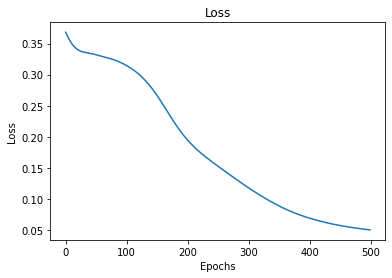

In [12]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

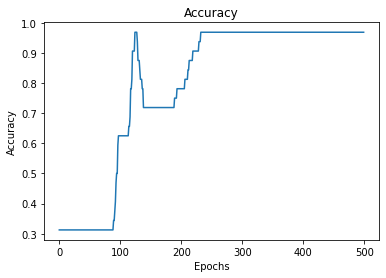

In [13]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Confusion matrix

In [14]:
pred = mlp.predict(x_test_ori)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_ori)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16  0  0]
 [ 0 12  1]
 [ 0  1 15]]


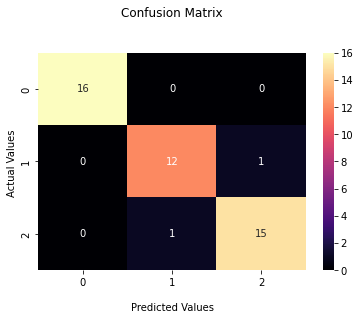

In [15]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(3))
ax.yaxis.set_ticklabels(i for i in range(3))

## Display the visualization of the Confusion Matrix.
plt.show()

In [16]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(3)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.96 


                      Classification Report                       
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



SGD

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_ori, y_train_ori, test_size=0.3)
ep = 200
mlp1 = Model()
mlp1.add_layer(4, 12, act_fn='sigmoid')
mlp1.add_layer(12, 24, act_fn='sigmoid')
mlp1.add_layer(24, 12, act_fn='sigmoid')
mlp1.add_layer(12, 3, act_fn='softmax')
losses1, accs1 = mlp1.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=1, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.35892484436545136 acc =  0.1875
epoch  1 loss =  0.3443568839132598 acc =  0.1875
epoch  2 loss =  0.3378848596164946 acc =  0.1875
epoch  3 loss =  0.3327581948290357 acc =  0.1875
epoch  4 loss =  0.3272806180149965 acc =  0.1875
epoch  5 loss =  0.32060031421717655 acc =  0.1875
epoch  6 loss =  0.3119693929446721 acc =  0.59375
epoch  7 loss =  0.300571965715126 acc =  0.59375
epoch  8 loss =  0.28555999038097374 acc =  0.59375
epoch  9 loss =  0.26749362234905516 acc =  0.59375
epoch  10 loss =  0.24913992438807048 acc =  0.59375
epoch  11 loss =  0.23219451384525475 acc =  0.59375
epoch  12 loss =  0.21718197928939298 acc =  0.59375
epoch  13 loss =  0.20415069148752507 acc =  0.59375
epoch  14 loss =  0.19274997526434057 acc =  0.59375
epoch  15 loss =  0.18244432171506847 acc =  0.59375
epoch  16 loss =  0.17274382702309604 acc =  0.65625
epoch  17 loss =  0.1633297516689099 acc =  0.78125
epoch  18 loss =  0.1540635744816198 acc =  0.84375
epoch  19 loss =  

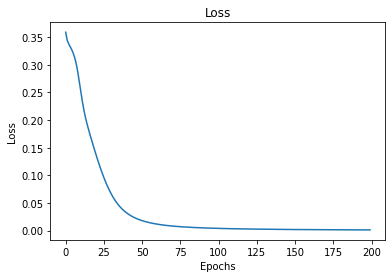

In [24]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses1)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

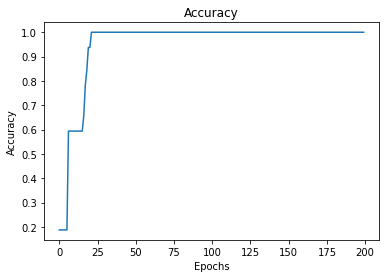

In [25]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs1)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [26]:
pred = mlp1.predict(x_test_ori)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_ori)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16  0  0]
 [ 0 12  1]
 [ 0  1 15]]


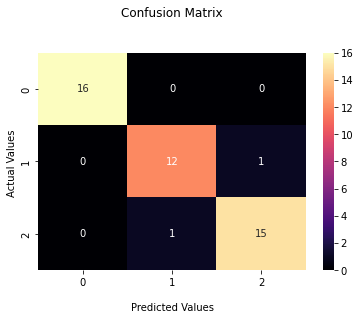

In [27]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(3))
ax.yaxis.set_ticklabels(i for i in range(3))

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(3)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.96 


                      Classification Report                       
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Mini Batch

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_ori, y_train_ori, test_size=0.3)
ep = 100
mlp2 = Model()
mlp2.add_layer(4, 12, act_fn='sigmoid')
mlp2.add_layer(12, 24, act_fn='sigmoid')
mlp2.add_layer(24, 12, act_fn='sigmoid')
mlp2.add_layer(12, 3, act_fn='softmax')
losses2, accs2 = mlp2.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=6, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.33363160919031454 acc =  0.375
epoch  1 loss =  0.33383402873011436 acc =  0.3125
epoch  2 loss =  0.3340941874653971 acc =  0.3125
epoch  3 loss =  0.33399344236365447 acc =  0.3125
epoch  4 loss =  0.3336433928873873 acc =  0.3125
epoch  5 loss =  0.3331852091718922 acc =  0.3125
epoch  6 loss =  0.33267166072161514 acc =  0.3125
epoch  7 loss =  0.3320995751464637 acc =  0.3125
epoch  8 loss =  0.33144899076638334 acc =  0.3125
epoch  9 loss =  0.33070155437116755 acc =  0.3125
epoch  10 loss =  0.329844640977888 acc =  0.3125
epoch  11 loss =  0.3288688488078404 acc =  0.3125
epoch  12 loss =  0.3277631064527732 acc =  0.3125
epoch  13 loss =  0.32650965947486155 acc =  0.3125
epoch  14 loss =  0.3250803620832792 acc =  0.3125
epoch  15 loss =  0.3234350092953031 acc =  0.3125
epoch  16 loss =  0.3215218400680709 acc =  0.46875
epoch  17 loss =  0.31928016973048917 acc =  0.65625
epoch  18 loss =  0.3166449768257701 acc =  0.6875
epoch  19 loss =  0.3135527041108

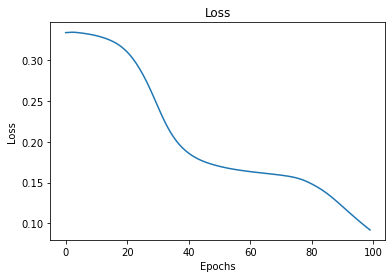

In [30]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses2)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

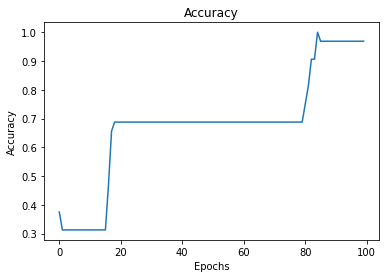

In [31]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs2)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [32]:
pred = mlp2.predict(x_test_ori)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_ori)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16  0  0]
 [ 0 13  0]
 [ 0  0 16]]


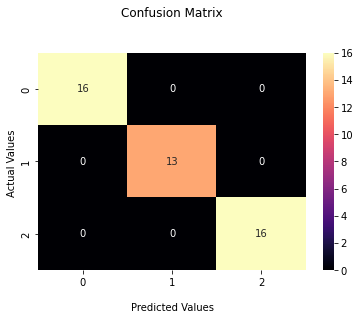

In [33]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(3))
ax.yaxis.set_ticklabels(i for i in range(3))

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(3)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 1.00 


                      Classification Report                       
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Taking 70% test set

In [46]:
x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(X_origin, y_origin, test_size=0.7)

In [54]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_ori, y_train_ori, test_size=0.3)
ep = 200
mlp5 = Model()
mlp5.add_layer(4, 12, act_fn='sigmoid')
mlp5.add_layer(12, 24, act_fn='sigmoid')
mlp5.add_layer(24, 12, act_fn='sigmoid')
mlp5.add_layer(12, 3, act_fn='softmax')
losses5, accs5 = mlp5.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=ep, batch_size=6, loss='squarederror', learning_rate=0.001)

epoch  0 loss =  0.327923886453407 acc =  0.42857142857142855
epoch  1 loss =  0.3274640555090401 acc =  0.42857142857142855
epoch  2 loss =  0.32711413640415393 acc =  0.42857142857142855
epoch  3 loss =  0.3268188454653384 acc =  0.42857142857142855
epoch  4 loss =  0.3265558335316748 acc =  0.42857142857142855
epoch  5 loss =  0.32631237768383575 acc =  0.42857142857142855
epoch  6 loss =  0.3260801192398352 acc =  0.42857142857142855
epoch  7 loss =  0.325853226155345 acc =  0.42857142857142855
epoch  8 loss =  0.3256275273786676 acc =  0.42857142857142855
epoch  9 loss =  0.3254000048623397 acc =  0.42857142857142855
epoch  10 loss =  0.32516844904739745 acc =  0.42857142857142855
epoch  11 loss =  0.3249312052471655 acc =  0.42857142857142855
epoch  12 loss =  0.32468697990634804 acc =  0.42857142857142855
epoch  13 loss =  0.3244346914666344 acc =  0.42857142857142855
epoch  14 loss =  0.3241733566751221 acc =  0.42857142857142855
epoch  15 loss =  0.3239020054367014 acc =  0.42

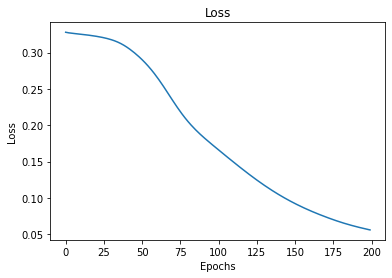

In [55]:
epoc = [i for i in range(ep)]
plt.plot(epoc,losses5)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

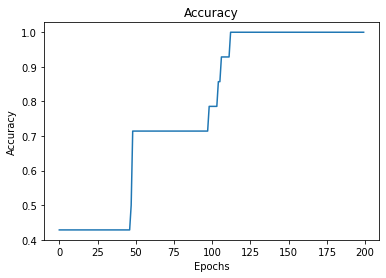

In [56]:
epoc = [i for i in range(ep)]
plt.plot(epoc,accs5)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [57]:
pred = mlp5.predict(x_test_ori)
y_pred = model.convert_to_binary(pred)
y_test = model.convert_to_binary(y_test_ori)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[38  0  0]
 [ 0 33  3]
 [ 0  0 31]]


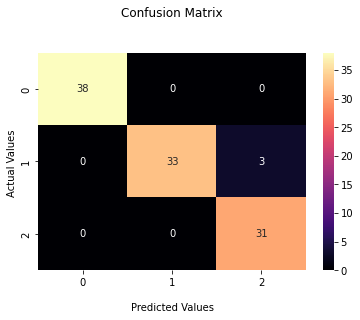

In [58]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(i for i in range(10))
ax.yaxis.set_ticklabels(i for i in range(10))

## Display the visualization of the Confusion Matrix.
plt.show()

In [59]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(3)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.97 


                      Classification Report                       
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.92      0.96        36
           2       0.91      1.00      0.95        31

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

